# Econometrics III - Problem set 1
### Javier Viviens Martín 

PhD in Economics - European University Institute. \
Course 2022-2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm

### Exercise 1

In [2]:
F = np.matrix('1.3 -0.4 ;1 0') #Companion Matrix

In [3]:
np.linalg.eig(F) # Eigen values of F. 

(array([0.8, 0.5]),
 matrix([[0.62469505, 0.4472136 ],
         [0.78086881, 0.89442719]]))

In [4]:
t = 30 #Number of periods you want to get the IRF
IRF = np.zeros(t) #save the IRF
for i in range(0,t):
    A = F**i
    IRF[i] = A[0,0] #Effect of u_{t} on y_{t+h} is F_{11}^{h}

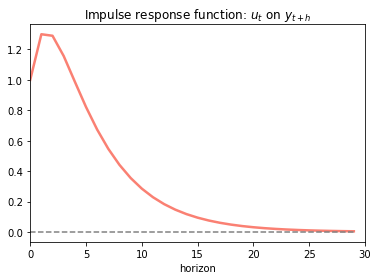

In [5]:
plt.plot(range(0,t),IRF, linewidth = 2.5, color = 'salmon',alpha = 2)
plt.plot(range(0,t),np.zeros(t), '--', color = 'grey')
plt.xlim(0, t)
plt.title("Impulse response function: $u_{t}$ on $y_{t+h}$")
plt.xlabel("horizon")
#plt.savefig('1.png', dpi = 600)
plt.show()

In [6]:
T = 500
u = np.random.normal(0,1,T) #simulate shocks.
y = np.zeros(T + 2)
y[0] = y[1] = 10 #Initialize the first two values of the series to its mean.
for i in range(2,T + 2):
    y[i] = 1 + 1.3*y[i-1] - 0.4*y[i-2] + u[i-2] #compute simulated AR process.

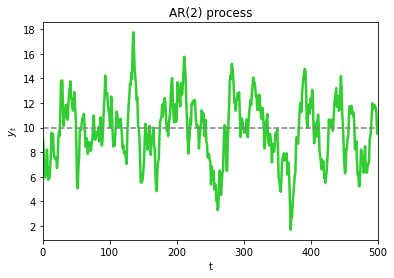

In [7]:
plt.plot(range(0,T),y[2:], linewidth = 2.5, color = 'limegreen',alpha = 2)
plt.plot(range(0,T),10*np.ones(T), '--', color = 'grey')
plt.xlabel("t")
plt.ylabel("$y_{t}$")
plt.xlim(0, T)
plt.title("AR(2) process")
#plt.savefig('2.png', dpi = 600)
plt.show()

The autocorrelation function is given by:

$$ \hat \mu = \frac{\sum_{t=1}^{T}y_{t}}{T}$$

$$ \hat \gamma_{j}= \frac{1}{T} \sum_{j+1}^{T}( y_{t} - \hat \mu)(y_{t-j}-\hat\mu)$$

$$ \hat \rho_{j} = \frac{\hat \gamma_{j}}{\hat \gamma_{0}} $$

In [8]:
muhat = sum(y[2:])/T #Compute sample mean µ.
deviation_from_mean = y - muhat #Get the deviation from the mean for every period.
gz = np.multiply(deviation_from_mean,deviation_from_mean) #To get gamma 0, I crossproduct (square) the deviations 
                                                            #from mean.
gamma_zero = sum(gz[2:])/T #Not consider the first two values (initialized to µ).
h = 20 #Number of periods you want to estimate the autocorrelation function.
gamma = np.zeros(h) #Here I'll save the value of gammas.
for i in range(1,h):
    dembora = np.multiply(deviation_from_mean[2 + i:],deviation_from_mean[2:-i]) #Compute cross products.
    gamma[i] = sum(dembora)/T #Using formula from slides, stated above.
gamma[0] = gamma_zero 
autocor = gamma / gamma_zero #Get the estimated autocorrelation.

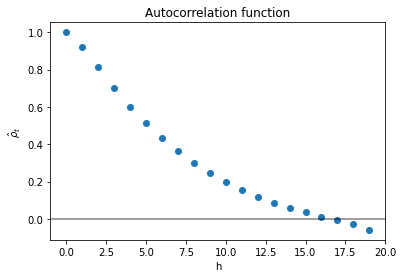

In [9]:
#for i in range(0,h):
 #   plt.axvline(x = i, ymin = 0, ymax = autocor[i], color = 'r')
plt.scatter(range(0,h),autocor)
plt.plot(range(-1,h+1),np.zeros(h+2), color = 'black', alpha=0.5)
plt.xlabel("h")
plt.ylabel(r"$\hat\rho_{t}$")
plt.xlim(-1, h)
plt.title("Autocorrelation function")
#plt.savefig('3.png', dpi = 600)
plt.show()

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

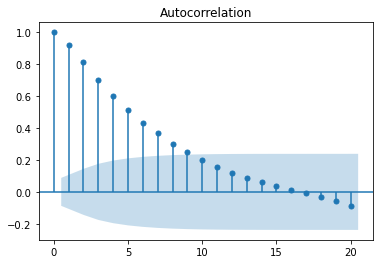

In [11]:
plot_acf(y[2:], lags=h); #Check if I did it correctly comparing with the build in function

In [12]:
part_autocor = np.zeros(h) #Here I'll save the values of the partial autocorrelation.
part_autocor[0] = autocor[0] #From the theoretical expression of the partial autocorrelation, we know the partial 
                            #autocorrelation or order 0 is equal to the autocorrelation of order 0.
X = np.ones((T ,h+1)) #initialize a matrix with ones
for i in range(1,h + 1):
    X[i:,i] = y[2:-i] #include the lags of y as regressors
for i in range(1,h): #for any lag, select the dependent variable accordingly as well as the part of matrix X of interest.
    yt = y[2 + i:] 
    x = X[i:,:-h+i]
    results = sm.OLS(endog=yt,exog=x).fit() #Run OLS.
    part_autocor[i] = results.params[-1] #Select the parameter of interest: the jth order partial autocorrelation is the 
    # value of the parameter of the jth regressors when regressing y_{t} on its j lags.

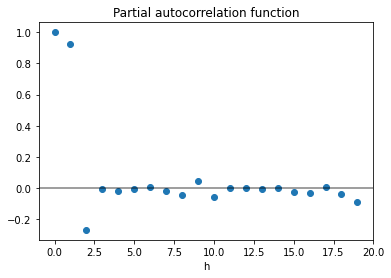

In [13]:
plt.plot(range(-1,h+1),np.zeros(h+2), color = 'black', alpha=0.5)
plt.scatter(range(0,h),part_autocor)
plt.xlabel("h")
#plt.ylabel("$\hat\rho_{t}$")
plt.title("Partial autocorrelation function")
plt.xlim(-1, h)
#plt.savefig('4.png', dpi = 600)
plt.show()

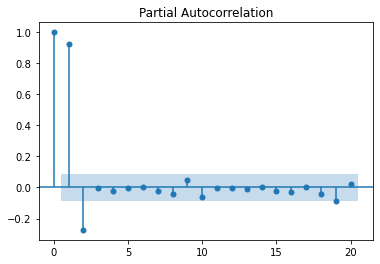

In [14]:
plot_pacf(y[2:], lags=h); #Again, check with the build in function to check if I computed it correctly.

### Exercise 2

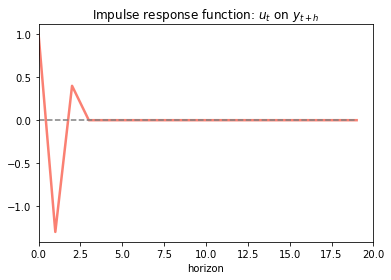

In [15]:
t = 20 #Number of periods you want to get the IRF
IRF2 = np.zeros(t) #save the IRF
IRF2[0] = 1
IRF2[1] = -1.3
IRF2[2] = 0.4
plt.plot(range(0,t),IRF2, linewidth = 2.5, color = 'salmon',alpha = 2)
plt.plot(range(0,t),np.zeros(t), '--', color = 'grey')
plt.xlim(0, t)
plt.title("Impulse response function: $u_{t}$ on $y_{t+h}$")
plt.xlabel("horizon")
#plt.savefig('5.png', dpi = 600)
plt.show()

In [16]:
T = 500
u = np.random.normal(0,1,T+2) #simulate shocks.
y = np.zeros(T )
for i in range(0,T):
    y[i] = 1 + u[i+2]-1.3*u[i+1] + 0.4*u[i]  #compute simulated AR process.

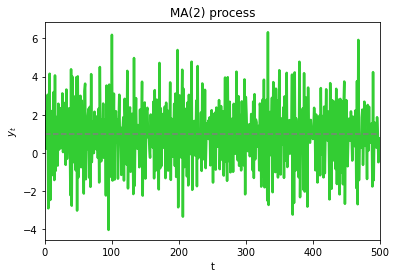

In [17]:
plt.plot(range(0,T),y[:], linewidth = 2.5, color = 'limegreen',alpha = 2)
plt.plot(range(0,T),np.ones(T), '--', color = 'grey')
plt.xlabel("t")
plt.ylabel("$y_{t}$")
plt.xlim(0, T)
plt.title("MA(2) process")
#plt.savefig('6.png', dpi = 600)
plt.show()

In [18]:
muhat = sum(y[2:])/T #Compute sample mean µ.
deviation_from_mean = y - muhat #Get the deviation from the mean for every period.
gz = np.multiply(deviation_from_mean,deviation_from_mean) #To get gamma 0, I crossproduct (square) the deviations 
                                                            #from mean.
gamma_zero = sum(gz)/T #Not consider the first two values (initialized to µ).
h = 20 #Number of periods you want to estimate the autocorrelation function.
gamma = np.zeros(h) #Here I'll save the value of gammas.
for i in range(1,h):
    dembora = np.multiply(deviation_from_mean[i:],deviation_from_mean[:-i]) #Compute cross products.
    gamma[i] = sum(dembora)/T #Using formula from slides, stated above.
gamma[0] = gamma_zero 
autocor = gamma / gamma_zero #Get the estimated autocorrelation.

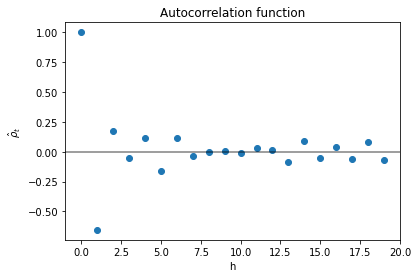

In [19]:
plt.scatter(range(0,h),autocor)
plt.plot(range(-1,h+1),np.zeros(h+2), color = 'black', alpha=0.5)
plt.xlabel("h")
plt.ylabel(r"$\hat\rho_{t}$")
plt.xlim(-1, h)
plt.title("Autocorrelation function")
#plt.savefig('7.png', dpi = 600)
plt.show()

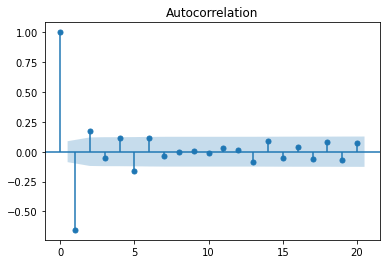

In [20]:
plot_acf(y[:], lags=h); #Check if I did it correctly comparing with the build in function

In [21]:
part_autocor = np.zeros(h) #Here I'll save the values of the partial autocorrelation.
part_autocor[0] = autocor[0] #From the theoretical expression of the partial autocorrelation, we know the partial 
                            #autocorrelation or order 0 is equal to the autocorrelation of order 0.
X = np.ones((T ,h+1)) #initialize a matrix with ones
for i in range(1,h + 1):
    X[i:,i] = y[:-i] #include the lags of y as regressors
for i in range(1,h): #for any lag, select the dependent variable accordingly as well as the part of matrix X of interest.
    yt = y[i:] 
    x = X[i:,:-h+i]
    results = sm.OLS(endog=yt,exog=x).fit() #Run OLS.
    part_autocor[i] = results.params[-1] #Select the parameter of interest: the jth order partial autocorrelation is the 
    # value of the parameter of the jth regressors when regressing y_{t} on its j lags.

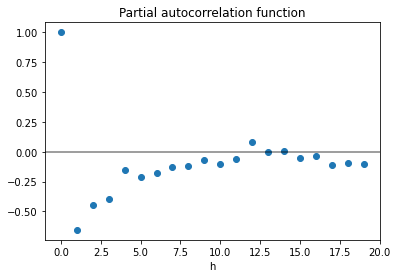

In [22]:
plt.plot(range(-1,h+1),np.zeros(h+2), color = 'black', alpha=0.5)
plt.scatter(range(0,h),part_autocor)
plt.xlabel("h")
#plt.ylabel("$\hat\rho_{t}$")
plt.title("Partial autocorrelation function")
plt.xlim(-1, h)
#plt.savefig('8.png', dpi = 600)
plt.show()

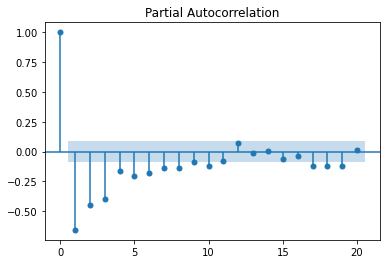

In [23]:
plot_pacf(y[2:], lags=h); #Again, check with the build in function to check if I computed it correctly.

### Exercise 3

In [24]:
import pandas as pd

In [25]:
datuak = pd.read_excel("UNRATE.xls") #Upload the data
datuak = datuak.to_numpy() #convert to numpy

In [26]:
T = len(datuak) #Save number of observations we have
y = np.zeros(T) #Right now we have an object with T arrays of 1 element. I want only one array with those elements.
for i in range(0,T):
    y[i] = datuak[i][0]

In [27]:
muhat = sum(y[2:])/T #Compute sample mean µ.
deviation_from_mean = y - muhat #Get the deviation from the mean for every period.
gz = np.multiply(deviation_from_mean,deviation_from_mean) #To get gamma 0, I crossproduct (square) the deviations 
                                                            #from mean.
gamma_zero = sum(gz)/T #Not consider the first two values (initialized to µ).
h = 24 #Number of periods you want to estimate the autocorrelation function.
gamma = np.zeros(h) #Here I'll save the value of gammas.
for i in range(1,h):
    dembora = np.multiply(deviation_from_mean[i:],deviation_from_mean[:-i]) #Compute cross products.
    gamma[i] = sum(dembora)/T #Using formula from slides, stated above.
gamma[0] = gamma_zero 
autocor = gamma / gamma_zero #Get the estimated autocorrelation.

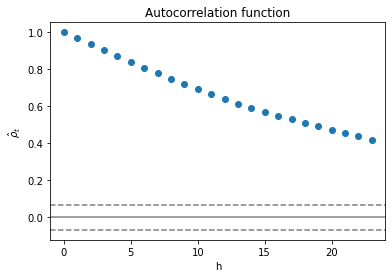

In [28]:
CI = 2/np.sqrt(T)
plt.scatter(range(0,h),autocor)
plt.plot(range(-1,h+1),np.zeros(h+2), color = 'black', alpha=0.5)
plt.plot(range(-1,h+1),CI*np.ones(h+2), '--',color = 'black', alpha=0.5)
plt.plot(range(-1,h+1),-CI*np.ones(h+2),'--', color = 'black', alpha=0.5)
plt.xlabel("h")
plt.ylabel(r"$\hat\rho_{t}$")
plt.xlim(-1, h)
plt.title("Autocorrelation function")
#plt.savefig('9.png', dpi = 600)
plt.show()

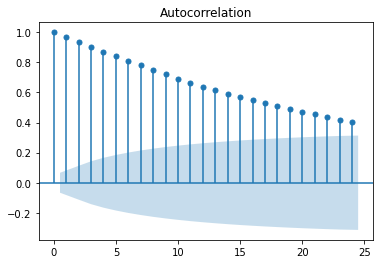

In [29]:
plot_acf(y[:], lags=h); #Check if I did it correctly comparing with the build in function

In [30]:
part_autocor = np.zeros(h) #Here I'll save the values of the partial autocorrelation.
part_autocor[0] = autocor[0] #From the theoretical expression of the partial autocorrelation, we know the partial 
                            #autocorrelation or order 0 is equal to the autocorrelation of order 0.
X = np.ones((T ,h+1)) #initialize a matrix with ones
for i in range(1,h + 1):
    X[i:,i] = y[:-i] #include the lags of y as regressors
for i in range(1,h): #for any lag, select the dependent variable accordingly as well as the part of matrix X of interest.
    yt = y[i:] 
    x = X[i:,:-h+i]
    results = sm.OLS(endog=yt,exog=x).fit() #Run OLS.
    part_autocor[i] = results.params[-1] #Select the parameter of interest: the jth order partial autocorrelation is the 
    # value of the parameter of the jth regressors when regressing y_{t} on its j lags.

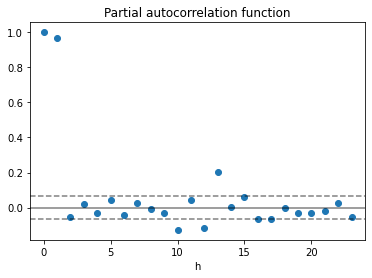

In [31]:
plt.plot(range(-1,h+1),np.zeros(h+2), color = 'black', alpha=0.5)
plt.plot(range(-1,h+1),CI*np.ones(h+2), '--',color = 'black', alpha=0.5)
plt.plot(range(-1,h+1),-CI*np.ones(h+2),'--', color = 'black', alpha=0.5)
plt.scatter(range(0,h),part_autocor)
plt.xlabel("h")
#plt.ylabel("$\hat\rho_{t}$")
plt.title("Partial autocorrelation function")
plt.xlim(-1, h)
#plt.savefig('10.png', dpi = 600)
plt.show()

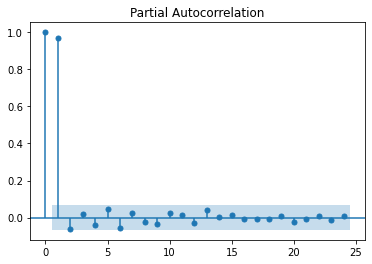

In [32]:
plot_pacf(y[2:], lags=h); #Again, check with the build in function to check if I computed it correctly.

In [33]:
from statsmodels.tsa.ar_model import ar_select_order

In [34]:
p = ar_select_order(y, maxlag= 100,ic='aic' ) #Number of lags according to AIC.
p.ar_lags

/Users/javierviviens/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/Users/javierviviens/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


array([1, 2])

In [35]:
p = ar_select_order(y, maxlag= 100,ic='hqic' )#Number of lags according to HQIC.
p.ar_lags

/Users/javierviviens/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/Users/javierviviens/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


array([1])

In [36]:
p = ar_select_order(y, maxlag= 100,ic='bic' )#Number of lags according to BIC.
p.ar_lags

/Users/javierviviens/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/Users/javierviviens/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


array([1])